This is the file for Dataset 2, "Superconductivity Data."  We will be predicting the value of the critical temperatures of superconductors based on the other variables.

In [135]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
superconductivty_data = fetch_ucirepo(id=464) 
  
# data (as pandas dataframes) 
X = superconductivty_data.data.features 
y = superconductivty_data.data.targets 
  

#first, let's inspect the data
print(f"Features: {list(X.columns)}")
print(f"Target: {list(y.columns)}") 



Features: ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_Elec

Then we need to scale the data so it is workable for regression. 

In [136]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the features
scaler = StandardScaler()

#Scaling for the features
X_scaled = scaler.fit_transform(X)

#Scaling for the target
y_scaled = scaler.fit_transform(y)
y_scaled = y_scaled.reshape(-1)



Then we need to split the dataset into training and testing, we will utilzing a 20/80 split for this.

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

Before we train the dataset, let's complete some exploratory data analysis.

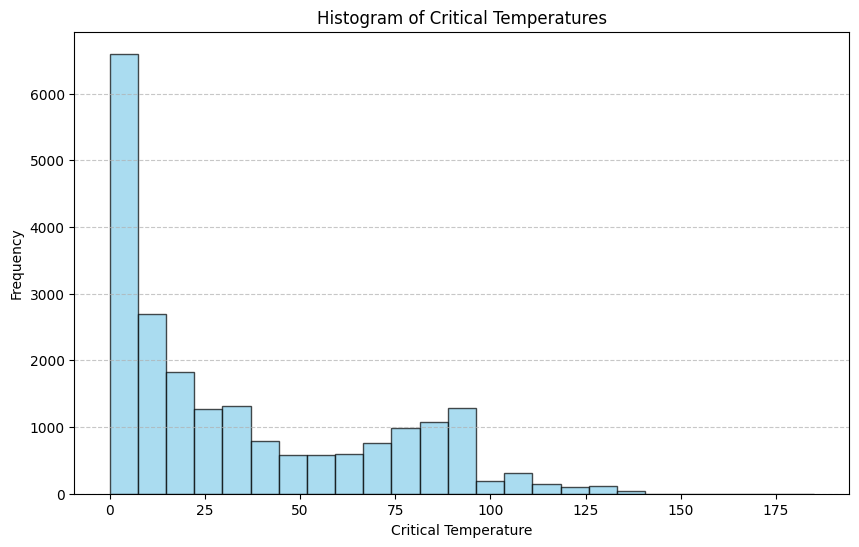

In [142]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your critical temperatures are stored in a pandas DataFrame
# Example: df['Critical_Temperature'] contains the critical temperature data
critical_temperatures = y  # Replace with your actual column name or data

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(critical_temperatures, bins=25, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Critical Temperatures')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

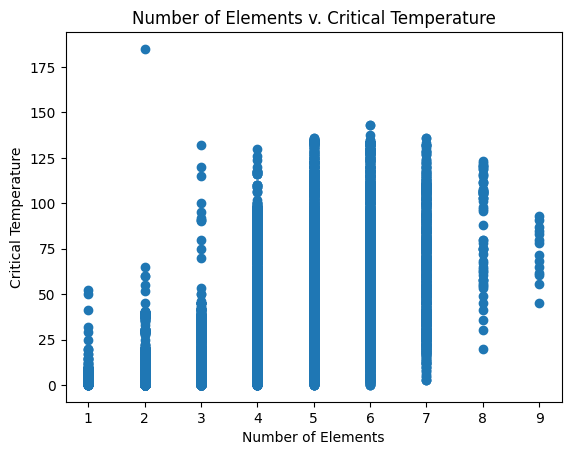

In [124]:
from matplotlib import pyplot as plt

plt.scatter(X['number_of_elements'], y)
plt.xlabel('Number of Elements')
plt.ylabel('Critical Temperature')
plt.title('Number of Elements v. Critical Temperature')
plt.show()

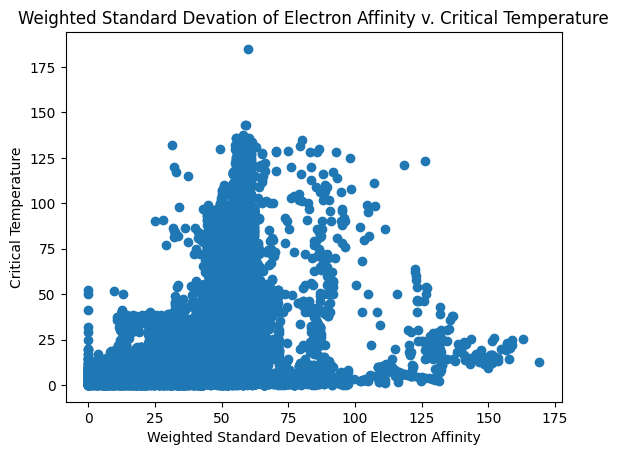

In [132]:
plt.scatter(X['wtd_std_ElectronAffinity'], y)
plt.xlabel('Weighted Standard Devation of Electron Affinity')
plt.ylabel('Critical Temperature')
plt.title('Weighted Standard Devation of Electron Affinity v. Critical Temperature')
plt.show()

Now, let's train our neural network model using Scikit Learn's MLPRegressor. Rather than saving each model referenced in the report, we chose to change the variables each time and retrain.

In [60]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp = MLPRegressor(
    hidden_layer_sizes=(500, 500, 500),
    max_iter=1000,
    random_state=42,
    verbose=1,
    tol=1e-8,
    learning_rate_init=0.001,
)

# Fit the model to the training data
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(rmse)


Iteration 1, loss = 0.14108338
Iteration 2, loss = 0.09124490
Iteration 3, loss = 0.08317880
Iteration 4, loss = 0.07764173
Iteration 5, loss = 0.07424434
Iteration 6, loss = 0.07045129
Iteration 7, loss = 0.06551953
Iteration 8, loss = 0.06407653
Iteration 9, loss = 0.06286911
Iteration 10, loss = 0.06028258
Iteration 11, loss = 0.05735137
Iteration 12, loss = 0.05507420
Iteration 13, loss = 0.05417394
Iteration 14, loss = 0.05308841
Iteration 15, loss = 0.05014804
Iteration 16, loss = 0.05242957
Iteration 17, loss = 0.05314896
Iteration 18, loss = 0.05061762
Iteration 19, loss = 0.04954316
Iteration 20, loss = 0.04709256
Iteration 21, loss = 0.04735108
Iteration 22, loss = 0.04903569
Iteration 23, loss = 0.05033651
Iteration 24, loss = 0.04440581
Iteration 25, loss = 0.05308867
Iteration 26, loss = 0.04554054
Iteration 27, loss = 0.04334162
Iteration 28, loss = 0.04195437
Iteration 29, loss = 0.04446312
Iteration 30, loss = 0.04356644
Iteration 31, loss = 0.04115669
Iteration 32, los

Then, we will analyze our selected model.

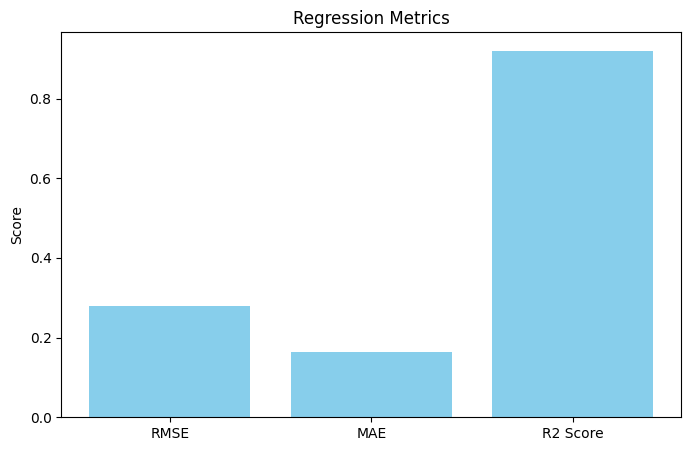

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics = {'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}

plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title('Regression Metrics')
plt.ylabel('Score')
plt.show()

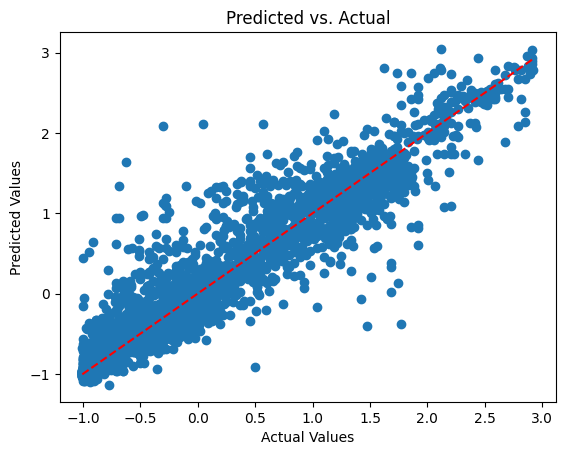

In [61]:
from matplotlib import pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


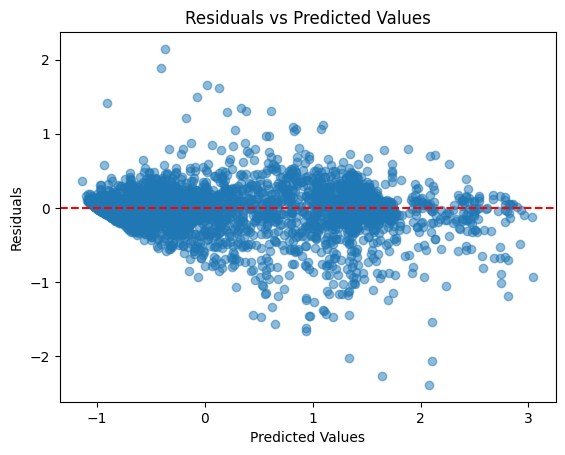

In [103]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [138]:
#we will use shap to determine feature importance
import shap

K=300
X_sample = shap.sample(X_train, K)

explainer = shap.KernelExplainer(mlp.predict, X_sample)
shap_values = explainer.shap_values(X_sample, nsamples=100) 

Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/300 [00:00<?, ?it/s]

c:\Users\C25Alyssa.Hargis\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_least_angle.py:645: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 44 iterations, i.e. alpha=2.525e-03, with an active set of 30 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
c:\Users\C25Alyssa.Hargis\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_least_angle.py:675: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 60 iterations, alpha=1.076e-03, previous alpha=1.044e-03, with an active set of 37 regressors.
  warnings.warn(
c:\Users\C25Alyssa.Hargis\487_finalproject\venv\lib\site-packages\sklearn\linear_model\_least_angle.py:675: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 103 iteration

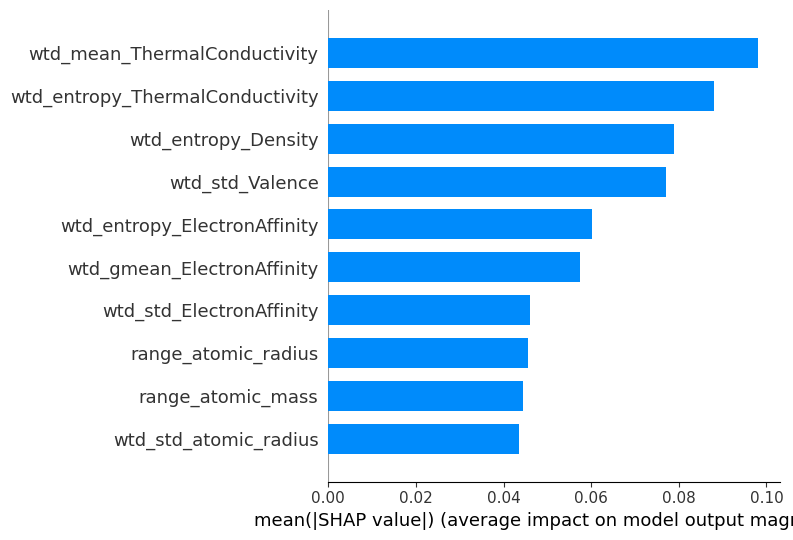

In [114]:
#this displays the calculated feature values.
shap.summary_plot(shap_values, X, max_display= 10, plot_type = "bar")

In [35]:
#then we will conduct five-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np


# Create an MLPClassifier and a pipeline with StandardScaler
pipeline = make_pipeline(StandardScaler(), mlp)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-cv_scores)

print("RMSE for each fold:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

c:\Users\C25Alyssa.Hargis\487_finalproject\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.11456321
Iteration 2, loss = 0.07282990
Iteration 3, loss = 0.06445806
Iteration 4, loss = 0.06153814
Iteration 5, loss = 0.06353024
Iteration 6, loss = 0.06009869
Iteration 7, loss = 0.05443765
Iteration 8, loss = 0.05222830
Iteration 9, loss = 0.05238647
Iteration 10, loss = 0.04944645
Iteration 11, loss = 0.04978783
Iteration 12, loss = 0.04720956
Iteration 13, loss = 0.04668274
Iteration 14, loss = 0.04482928
Iteration 15, loss = 0.04525923
Iteration 16, loss = 0.04567351
Iteration 17, loss = 0.04319969
Iteration 18, loss = 0.04289011
Iteration 19, loss = 0.04248534
Iteration 20, loss = 0.04277288
Iteration 21, loss = 0.03917667
Iteration 22, loss = 0.03854148
Iteration 23, loss = 0.04026138
Iteration 24, loss = 0.04067827
Iteration 25, loss = 0.03807440
Iteration 26, loss = 0.03621893
Iteration 27, loss = 0.03640425
Iteration 28, loss = 0.03758467
Iteration 29, loss = 0.03566467
Iteration 30, loss = 0.03497703
Iteration 31, loss = 0.03446212
Iteration 32, los

c:\Users\C25Alyssa.Hargis\487_finalproject\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.11727632
Iteration 2, loss = 0.07161033
Iteration 3, loss = 0.06436736
Iteration 4, loss = 0.05751817
Iteration 5, loss = 0.05543942
Iteration 6, loss = 0.05202593
Iteration 7, loss = 0.05267696
Iteration 8, loss = 0.04898467
Iteration 9, loss = 0.04954578
Iteration 10, loss = 0.04759300
Iteration 11, loss = 0.04402079
Iteration 12, loss = 0.04249677
Iteration 13, loss = 0.04620463
Iteration 14, loss = 0.04281698
Iteration 15, loss = 0.04027475
Iteration 16, loss = 0.03929861
Iteration 17, loss = 0.03801419
Iteration 18, loss = 0.04045698
Iteration 19, loss = 0.03712666
Iteration 20, loss = 0.03472347
Iteration 21, loss = 0.03557624
Iteration 22, loss = 0.03519567
Iteration 23, loss = 0.03560128
Iteration 24, loss = 0.03366656
Iteration 25, loss = 0.03680465
Iteration 26, loss = 0.03304559
Iteration 27, loss = 0.03156783
Iteration 28, loss = 0.03416210
Iteration 29, loss = 0.03324853
Iteration 30, loss = 0.03108100
Iteration 31, loss = 0.03230747
Iteration 32, los

c:\Users\C25Alyssa.Hargis\487_finalproject\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.14082933
Iteration 2, loss = 0.09395039
Iteration 3, loss = 0.08575150
Iteration 4, loss = 0.07825166
Iteration 5, loss = 0.07645222
Iteration 6, loss = 0.07072761
Iteration 7, loss = 0.06952237
Iteration 8, loss = 0.06600938
Iteration 9, loss = 0.06441269
Iteration 10, loss = 0.05985076
Iteration 11, loss = 0.06342742
Iteration 12, loss = 0.05690990
Iteration 13, loss = 0.05417863
Iteration 14, loss = 0.05523256
Iteration 15, loss = 0.05331543
Iteration 16, loss = 0.05062087
Iteration 17, loss = 0.05042251
Iteration 18, loss = 0.04948724
Iteration 19, loss = 0.04792975
Iteration 20, loss = 0.05207336
Iteration 21, loss = 0.04794014
Iteration 22, loss = 0.05670472
Iteration 23, loss = 0.04754861
Iteration 24, loss = 0.04674710
Iteration 25, loss = 0.04280188
Iteration 26, loss = 0.04296961
Iteration 27, loss = 0.04316108
Iteration 28, loss = 0.04610875
Iteration 29, loss = 0.04406748
Iteration 30, loss = 0.04132153
Iteration 31, loss = 0.03954278
Iteration 32, los

c:\Users\C25Alyssa.Hargis\487_finalproject\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.14896281
Iteration 2, loss = 0.10149341
Iteration 3, loss = 0.08933641
Iteration 4, loss = 0.08403130
Iteration 5, loss = 0.08257020
Iteration 6, loss = 0.07593132
Iteration 7, loss = 0.07266247
Iteration 8, loss = 0.06775274
Iteration 9, loss = 0.06872640
Iteration 10, loss = 0.06485629
Iteration 11, loss = 0.06411613
Iteration 12, loss = 0.06107380
Iteration 13, loss = 0.05813819
Iteration 14, loss = 0.05686999
Iteration 15, loss = 0.05778800
Iteration 16, loss = 0.05499402
Iteration 17, loss = 0.05623494
Iteration 18, loss = 0.05496777
Iteration 19, loss = 0.05407207
Iteration 20, loss = 0.05147925
Iteration 21, loss = 0.05355585
Iteration 22, loss = 0.05092570
Iteration 23, loss = 0.04945944
Iteration 24, loss = 0.04866353
Iteration 25, loss = 0.04763846
Iteration 26, loss = 0.05214496
Iteration 27, loss = 0.05395226
Iteration 28, loss = 0.04556314
Iteration 29, loss = 0.04614360
Iteration 30, loss = 0.04472962
Iteration 31, loss = 0.04683431
Iteration 32, los

c:\Users\C25Alyssa.Hargis\487_finalproject\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.14001797
Iteration 2, loss = 0.09521844
Iteration 3, loss = 0.08609659
Iteration 4, loss = 0.07902423
Iteration 5, loss = 0.07902516
Iteration 6, loss = 0.07293158
Iteration 7, loss = 0.07044694
Iteration 8, loss = 0.06516233
Iteration 9, loss = 0.06427440
Iteration 10, loss = 0.05928048
Iteration 11, loss = 0.05851775
Iteration 12, loss = 0.05698376
Iteration 13, loss = 0.05526051
Iteration 14, loss = 0.05476333
Iteration 15, loss = 0.05397933
Iteration 16, loss = 0.05183913
Iteration 17, loss = 0.05160566
Iteration 18, loss = 0.04955606
Iteration 19, loss = 0.04998849
Iteration 20, loss = 0.04752324
Iteration 21, loss = 0.04907672
Iteration 22, loss = 0.04776620
Iteration 23, loss = 0.04639129
Iteration 24, loss = 0.04443535
Iteration 25, loss = 0.04462682
Iteration 26, loss = 0.04598260
Iteration 27, loss = 0.04875915
Iteration 28, loss = 0.04264548
Iteration 29, loss = 0.04834765
Iteration 30, loss = 0.04441810
Iteration 31, loss = 0.04551675
Iteration 32, los

Then we will create a Linear Regression with Regularization model.

In [98]:
from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor(verbose = 1,alpha = 0.0001, epsilon = .1, tol = 1e-6, random_state=42)

regressor.fit(X_train, y_train)

y_pred1 = regressor.predict(X_test)

rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))

print(rmse1)

-- Epoch 1
Norm: 0.81, NNZs: 81, Bias: -0.014048, T: 17010, Avg. loss: 0.161501
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.94, NNZs: 81, Bias: 0.011233, T: 34020, Avg. loss: 0.150954
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 81, Bias: -0.005333, T: 51030, Avg. loss: 0.148134
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.11, NNZs: 81, Bias: -0.007521, T: 68040, Avg. loss: 0.146200
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.17, NNZs: 81, Bias: -0.000090, T: 85050, Avg. loss: 0.145267
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.24, NNZs: 81, Bias: 0.007614, T: 102060, Avg. loss: 0.144176
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.29, NNZs: 81, Bias: 0.003876, T: 119070, Avg. loss: 0.143381
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.34, NNZs: 81, Bias: -0.011529, T: 136080, Avg. loss: 0.142496
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 1.39, NNZs: 81, Bias: -0.001801, T: 153090, Avg. loss: 0.142217

We will then conduct analyses on the model

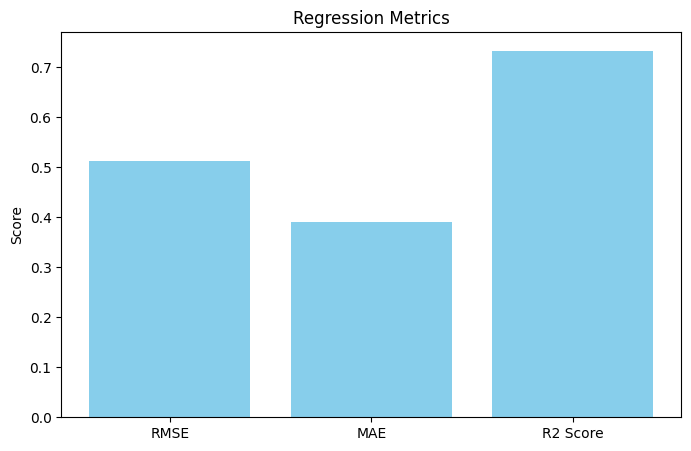

In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

metrics = {'RMSE': rmse, 'MAE': mae, 'R2 Score': r2}

plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title('Regression Metrics')
plt.ylabel('Score')
plt.show()

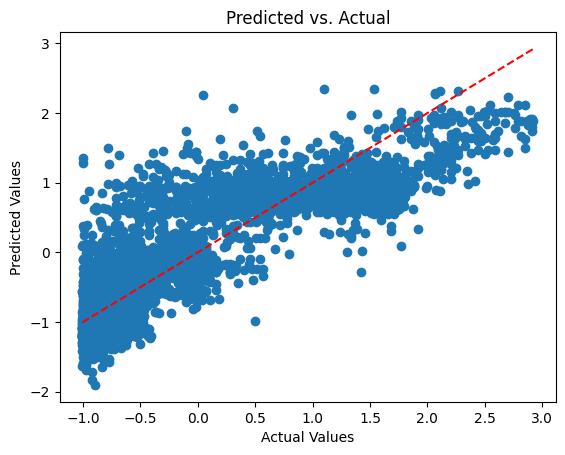

In [101]:
from matplotlib import pyplot as plt

plt.scatter(y_test, y_pred1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

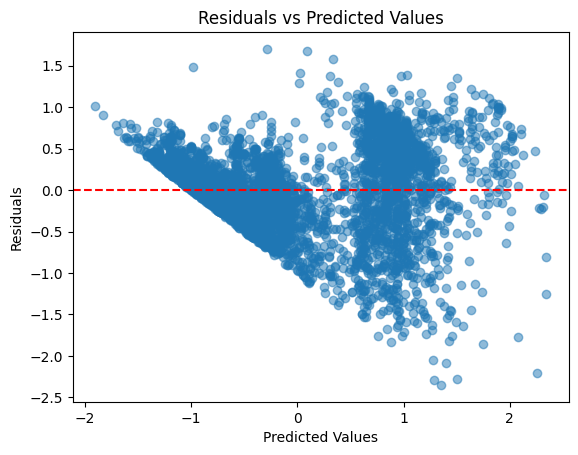

In [102]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred1
plt.scatter(y_pred1, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

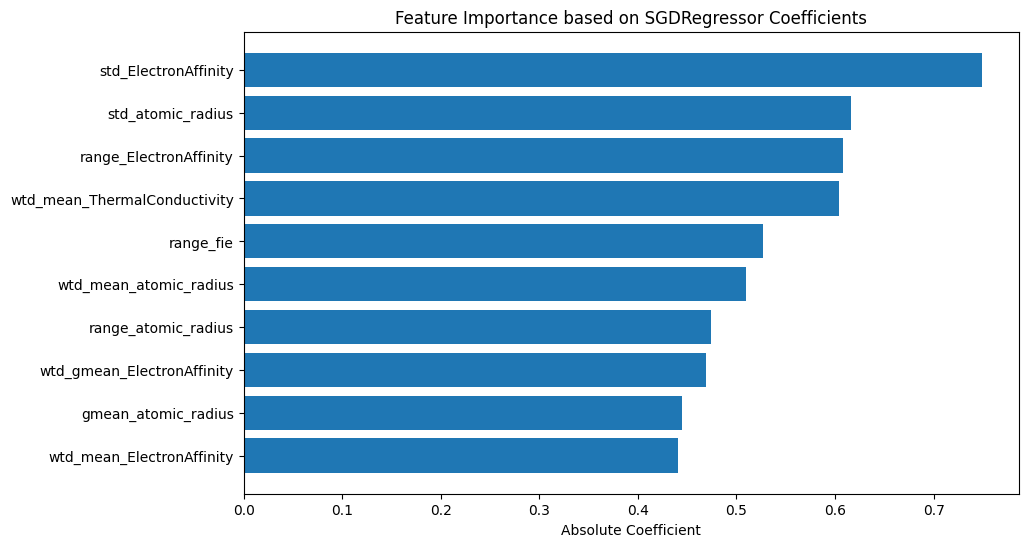

In [121]:

coefficients = regressor.coef_

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Coefficient': coefficients  # Coefficients as importance
})

# Sort the DataFrame by the absolute value of coefficients (larger absolute values indicate more importance)
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

top_10 = feature_importance_df.head(10)

# Plot the feature coefficients (importance)
plt.figure(figsize=(10, 6))
plt.barh(top_10['Feature'], top_10['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance based on SGDRegressor Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [100]:
# Create an MLPClassifier and a pipeline with StandardScaler
pipeline = make_pipeline(StandardScaler(), regressor)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error')

rmse_scores1 = np.sqrt(-cv_scores)

print("RMSE for each fold:", rmse_scores1)
print("Average RMSE:", rmse_scores1.mean())

-- Epoch 1
Norm: 0.74, NNZs: 81, Bias: -0.196189, T: 17010, Avg. loss: 0.134030
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.86, NNZs: 81, Bias: -0.207660, T: 34020, Avg. loss: 0.124652
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.95, NNZs: 81, Bias: -0.199105, T: 51030, Avg. loss: 0.122363
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 81, Bias: -0.200247, T: 68040, Avg. loss: 0.120623
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.08, NNZs: 81, Bias: -0.203874, T: 85050, Avg. loss: 0.119820
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.14, NNZs: 81, Bias: -0.199279, T: 102060, Avg. loss: 0.118689
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 81, Bias: -0.208680, T: 119070, Avg. loss: 0.118006
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 1.24, NNZs: 81, Bias: -0.213033, T: 136080, Avg. loss: 0.117579
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 1.29, NNZs: 81, Bias: -0.197644, T: 153090, Avg. loss: 0.117